Prueba de codigo de Shor

In [29]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

aer_sim = Aer.get_backend('aer_simulator')

Modelo de ruido

In [30]:
noise_model = NoiseModel()
p_error = 0.05
bit_flip = pauli_error([('X',p_error), ('I', 1-p_error)])
noise_model.add_quantum_error(bit_flip, "bit_flip", [0])
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['bit_flip']
  Qubits with noise: [0]
  Specific qubit errors: [('bit_flip', (0,))]


In [34]:
simulator_test= AerSimulator(noise_model = noise_model)

q_test = QuantumRegister(1, 'q_test')
c_test = ClassicalRegister(1, 'c_test')

circuit_test = QuantumCircuit(q_test,c_test)
circuit_test_ruido = transpile(circuit_test, simulator_test)

counts_test = simulator_test.run(circuit_test_ruido, shots=1024).result().get_counts()
plot_histogram(counts_test)

QiskitError: 'No counts for experiment "0"'

Modelo corregido con algoritmo de Shor

In [ ]:
q = QuantumRegister(9,'q')
c = ClassicalRegister(1,'c')
circuit = QuantumCircuit(q,c)

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)
### Error simulation   ###
circuit.x(q[0])
##########################


circuit.barrier(q)
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])

circuit.barrier(q)

circuit.measure(q[0],c[0])



circuit.draw(output='mpl', style="clifford")

simulator = Aer.get_backend('aer_simulator')
counts = simulator.run(circuit, shots=1024).result().get_counts()
print(counts)

{'0': 1024}


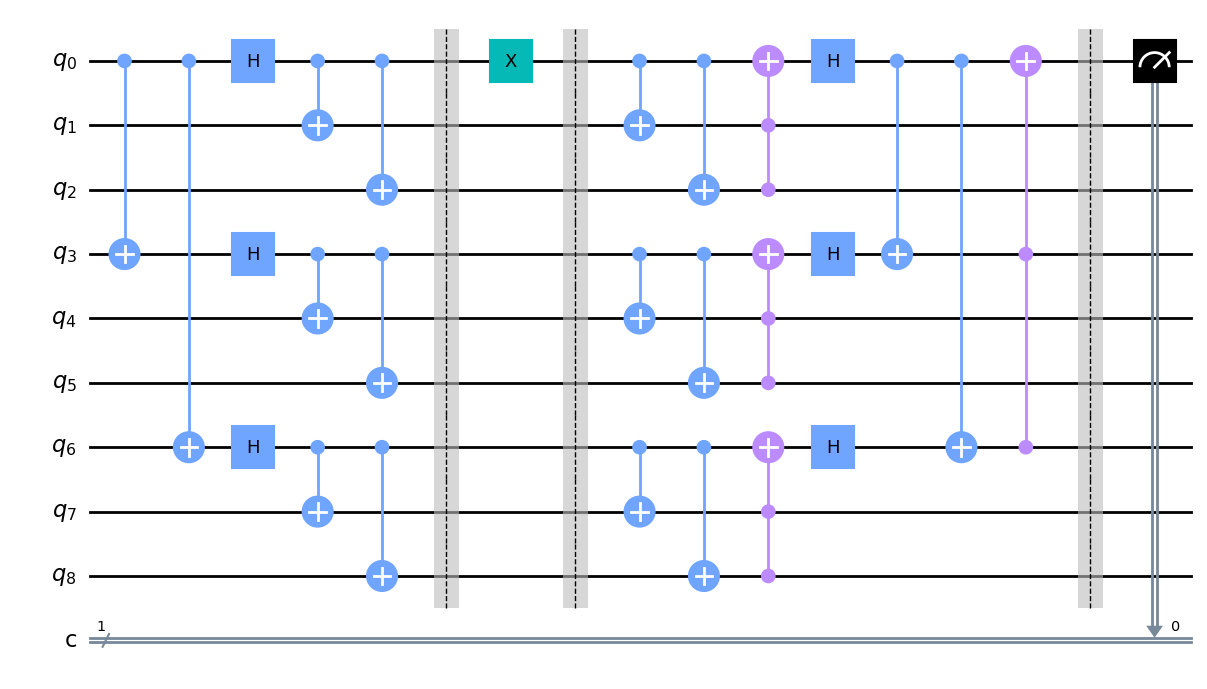

In [ ]:
circuit.draw(output='mpl', style="clifford")

simulamos el Error   